<a href="https://colab.research.google.com/github/khr-hanna/programowanie/blob/main/Projekt_zaliczeniowy_hanna_khramava_grupa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv ("/content/dane7.csv")

Część 1 - przetwarzanie i oczyszczanie danych

In [2]:
def convert_short_day_to_full_polish(string):
    day_mapping = {
        'Mon': 'Poniedziałek',
        'Tue': 'Wtorek',
        'Wed': 'Środa',
        'Thu': 'Czwartek',
        'Fri': 'Piątek',
        'Sat': 'Sobota',
        'Sun': 'Niedziela'
    }
    return map_and_replace(day_mapping, string)


def convert_month_name_to_num(string):
    month_mapping = {
        'Jan': '01',
        'Feb': '02',
        'Mar': '03',
        'Apr': '04',
        'May': '05',
        'Jun': '06',
        'Jul': '07',
        'Aug': '08',
        'Sep': '09',
        'Oct': '10',
        'Nov': '11',
        'Dec': '12'
    }
    return map_and_replace(month_mapping, string)


def map_and_replace(mapping_dict, string):
    for element in mapping_dict:
        string = string.replace(element, mapping_dict[element])
    return string


def remove_stop_words(input_string):
    polish_stop_words = [
        "i", "w", "z", "na", "do", "od", "przez", "po", "za", "zaś", "ale", "lub", "czy",
        "też", "jest", "być", "nie", "co", "który", "ten", "ta", "to", "tak", "taki", "tylko",
        "już", "teraz", "jeszcze", "niż", "nad", "pod", "a", "że", "bardzo", "ci", "ciebie",
        "cie", "coś", "kto", "które", "którego", "której", "których", "którzy", "jeśli", "gdy",
        "gdyby", "żeby", "bo", "ponieważ", "dlatego", "więc", "także", "albo", "lub", "czy"
    ]
    words = input_string.split()
    filtered_words = [word for word in words if word.lower() not in polish_stop_words]
    return ' '.join(filtered_words)

links_to_tweets = df['tweet_url'].to_list()
links_in_tweets = df['urls'].to_list()
links_to_media = df['media'].to_list()

In [3]:
# 1.Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia)

df['created_at'] = df['created_at'].apply(convert_short_day_to_full_polish)
df['created_at']

0       Piątek Jun 04 15:00:49 +0000 2021
1       Piątek Jun 04 15:34:48 +0000 2021
2       Piątek Jun 04 15:00:23 +0000 2021
3       Piątek Jun 04 15:12:26 +0000 2021
4       Piątek Jun 04 14:39:29 +0000 2021
                      ...                
5097    Wtorek Jun 01 02:04:38 +0000 2021
5098    Wtorek Jun 01 02:35:04 +0000 2021
5099    Wtorek Jun 01 02:56:11 +0000 2021
5100    Wtorek Jun 01 02:54:15 +0000 2021
5101    Wtorek Jun 01 02:55:37 +0000 2021
Name: created_at, Length: 5102, dtype: object

In [4]:
# 2.Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06)

df['created_at'] = df['created_at'].apply(convert_month_name_to_num)
df['created_at']

0       Piątek 06 04 15:00:49 +0000 2021
1       Piątek 06 04 15:34:48 +0000 2021
2       Piątek 06 04 15:00:23 +0000 2021
3       Piątek 06 04 15:12:26 +0000 2021
4       Piątek 06 04 14:39:29 +0000 2021
                      ...               
5097    Wtorek 06 01 02:04:38 +0000 2021
5098    Wtorek 06 01 02:35:04 +0000 2021
5099    Wtorek 06 01 02:56:11 +0000 2021
5100    Wtorek 06 01 02:54:15 +0000 2021
5101    Wtorek 06 01 02:55:37 +0000 2021
Name: created_at, Length: 5102, dtype: object

In [8]:
# 3.Pobierz wszystkie linki do tweetów i przekaż je do listy.

links_to_tweets = df['tweet_url'].to_list()
print(df['tweet_url'])

0       https://twitter.com/d3bil0x/status/14008299035...
1       https://twitter.com/ftg_soccer/status/14008384...
2       https://twitter.com/marek14618246/status/14008...
3       https://twitter.com/tokmada/status/14008328268...
4       https://twitter.com/Krystyn01906241/status/140...
                              ...                        
5097    https://twitter.com/Max94842047/status/1399547...
5098    https://twitter.com/MarekKopacz10/status/13995...
5099    https://twitter.com/Dosia1960/status/139956038...
5100    https://twitter.com/SlawekRetmaniak/status/139...
5101    https://twitter.com/xkaethex/status/1399560236...
Name: tweet_url, Length: 5102, dtype: object


In [9]:
# 4.Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)

links_in_tweets = df['urls'].to_list()
print(df['urls'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5097    NaN
5098    NaN
5099    NaN
5100    NaN
5101    NaN
Name: urls, Length: 5102, dtype: object


In [10]:
# 5.Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).

links_to_media = df['media'].to_list()
print(df['media'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5097    NaN
5098    NaN
5099    NaN
5100    NaN
5101    NaN
Name: media, Length: 5102, dtype: object


In [28]:
# 6.Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords

df['text_without_stopwords'] = df['text'].apply(remove_stop_words)
print(df[['text', 'text_without_stopwords']])

                                                   text  \
0     💬@AKowalinski prezes RN Warszawa: Profanacje i...   
1     GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...   
2     Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...   
3     Warszawa 04-06-2021\nBojówki OrdoZjebów w akcj...   
4     @trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...   
...                                                 ...   
5097  Wyobraziłam sobie, jakby wyglądała Warszawa,  ...   
5098  Rada Warszawy podjęła uchwałę krajobrazową dot...   
5099  Rada Warszawy podjęła uchwałę krajobrazową dot...   
5100  Zbliża się 81 rocznica I Transportu do KL Ausc...   
5101                              @_warszawa Skajak amo   

                                 text_without_stopwords  
0     💬@AKowalinski prezes RN Warszawa: Profanacje a...  
1     GOAL! Ursus Warszawa in Poland 3. Liga Ursus W...  
2     Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...  
3     Warszawa 04-06-2021 Bojówki OrdoZjebów akcji. ...  
4

Część 2 - eksploracyjna analiza danych


In [30]:
def print_top5_tweets(data_frame, column_name):
    sorted_df = data_frame.sort_values(by=column_name, ascending=False)
    sorted_df.reset_index()
    print('='*100)
    print(f"Top 5 tweets with highest values in '{column_name}':")
    for i in range(5):
        selected_row = sorted_df.iloc[i]
        print('-'*100)
        print(f"Tweet No. {i + 1}:\n{selected_row['text']}")
    del sorted_df


def print_based_on_bool_columns(data_frame, column_name, bool_to_print, column_to_print=None):
    data_frame[column_name] = data_frame[column_name].replace({'false': False, 'true': True})
    filtered_rows = data_frame[data_frame[column_name] == bool_to_print]
    print('='*100)
    print(f'{column_name} is {bool_to_print}:')
    for index, row in filtered_rows.iterrows():
        row_dict = row.to_dict()
        print('-'*100)
        if column_to_print in row_dict:
            print(f"{row_dict[column_to_print]}")
    del filtered_rows


def print_most_fresh_user_tweets(data_frame, time_column, user_id_column):
    data_frame[time_column] = pd.to_datetime(data_frame[time_column], format='%a %b %d %H:%M:%S +0000 %Y')
    most_fresh_user = data_frame.loc[data_frame[time_column].idxmax()][user_id_column]
    print_user_tweets(data_frame, most_fresh_user)


def print_user_with_most_followers_tweets(data_frame, user_id_column, followers_count_column):
    most_followers_index = data_frame[followers_count_column].idxmax()
    most_followers_user_id = data_frame.loc[most_followers_index, user_id_column]
    print_user_tweets(data_frame, most_followers_user_id)


def print_user_tweets(data_frame, user_id):
    user_rows = data_frame[data_frame['user_id'] == user_id]
    print('='*100)
    print(f'Tweets of user with id: {user_id}:')
    for tweet in user_rows['text']:
        print('-'*100)
        print(f'{tweet}')
    del user_rows


def tweets_by_day_analyzer(data_frame, time_column, return_max_day=False):
    cloned_df = data_frame.copy()
    cloned_df = cloned_df[time_column].str.split(' ').str[0].value_counts().reset_index()
    cloned_df.columns = ['Day', 'Tweets']
    return cloned_df


In [31]:
# 1.Wypisz top5 tweetów z największa liczbą polubień.

print_top5_tweets (df, 'favorite_count')

Top 5 tweets with highest values in 'favorite_count':
----------------------------------------------------------------------------------------------------
Tweet No. 1:
Dziś z prezydent-elekt @Tsihanouskaya mówiliśmy o pomocy dla Białorusi. Jako samorządowcy pomagamy jak możemy – przekazujemy informacje, wspieramy organizacje białoruskie. Pomagamy też Białorusinom, których w @warszawa jest najwiecej, np. przyznając mieszkania. https://t.co/3lUibemkLj
----------------------------------------------------------------------------------------------------
Tweet No. 2:
Warszawa czeka na @Tsihanouskaya. #StandWithBelarus https://t.co/NSCx89TdY7
----------------------------------------------------------------------------------------------------
Tweet No. 3:
Jasio, który nie panuje nad swoją jadaczką, znowu przegrał proces. 
Młody jest. Ciekawe ile się tego nazbiera przez kolejne lata? 
https://t.co/cc0AQFHY1z
---------------------------------------------------------------------------------------

In [ ]:
# 2.Wypisz top5 tweetów z największa liczbą retweetów.

print_top5_tweets(df, 'retweet_count')

Top 5 tweets with highest values in 'retweet_count':
----------------------------------------------------------------------------------------------------
Tweet No. 1:
HALO WARSZAWA
chętnie rozjaśnię, ufarbuję, zetnę Wam włosy tanio i dobrze
przez obecną sytuację notorycznie upierdalają mi godziny w robocie, a pod koniec roku będę miał robiony prywatnie ważny i kosztowny zabieg, i potrzebuję dorobić na boku

proszę chociaż o RT https://t.co/AqlxWzn9u0
----------------------------------------------------------------------------------------------------
Tweet No. 2:
‼️
A teraz perełka. Finał Was rozwali. 
10-10-2019 Warszawa
Leszek jest niepełnosprawny. Znalazł się w parku w pobliżu pl. Piłsudskiego gdzie akurat odbywały się jasełka smoleńskie. Leszek został zatrzymany przez 5 policjantów. https://t.co/ELmX7gsRAW
----------------------------------------------------------------------------------------------------
Tweet No. 3:
UWAGA #Warszawa Śniadeckich 12/16

Pani Danuta i Pan Stanisław od

In [ ]:
# 3.Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).

print_based_on_bool_columns(df, 'possibly_sensitive', False, 'text')

Выходные данные были обрезаны до нескольких последних строк (5000).
----------------------------------------------------------------------------------------------------
W rocznicę #4czerwca prezydent @trzaskowski_ ramię w ramię z #cichanouska.

https://t.co/sXUtuOv1Mf
----------------------------------------------------------------------------------------------------
🔴#NaŻywo: uroczyste odsłonięcie pomnika „Solidarności”: https://t.co/xIfsAR1LGE  @Tsihanouskaya @M_K_Blonska @EDGrupinska @warszawa
----------------------------------------------------------------------------------------------------
3. dzień MP Juniorek Młodszych-Olecko 2021 pod patronatem @PKN_ORLEN 
LTS Legionovia Legionowo – KS Metro Warszawa 3:1 (25:21, 22:25, 25:23, 25:12) https://t.co/uapjdq7oak
----------------------------------------------------------------------------------------------------
Protestanci w Warszawie⛪ Protestants in Warsaw⛪ #protestanci #protestantyzm #kościół #kościółWniebowstąpieniaPańskiego #Puła

In [ ]:
# 4.Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).

print_most_fresh_user_tweets(df, 'user_created_at', 'user_id')

Tweets of user with id: 1400535453539909636:
----------------------------------------------------------------------------------------------------
@PaweGrabowski4 @Protest_wolo @BeuthMonika @JustynaGlusman @warszawa @AdoptujzPalucha Średnio 40 psów dziennie na 8h pracy opiekuna. Ile to czasu?
----------------------------------------------------------------------------------------------------
@PaweGrabowski4 @Protest_wolo @BeuthMonika @JustynaGlusman @warszawa @AdoptujzPalucha Mróz, skwar, błoto, deszcz, bród, hałas, smród, rozpacz po stracie podopiecznego czy frustracja na bezmyślność ludzką nas nie zniechęcają. Tanie sugestie i pomówienia tym bardziej
----------------------------------------------------------------------------------------------------
@PaweGrabowski4 @Protest_wolo @BeuthMonika @JustynaGlusman @warszawa @AdoptujzPalucha Na jakiej podstawie takie podejrzenie? 🤔 Sam dyrektor schroniska mówił, że nikt tak nie zadba o dobro psów jak wolontariusze, więc chyba rozumie, że mówi

In [ ]:
# 5.Wyświetl tweety użytkownika. który ma najwięcej followersów.

print_user_with_most_followers_tweets(df, 'user_id', 'user_followers_count')

Tweets of user with id: 14493047:
----------------------------------------------------------------------------------------------------
"Jego spokój pozytywnie udziela się pozostałym żyrafom, ułatwia integrację stada"🦒

ZOBACZ👇
https://t.co/9dN2F3nukf
----------------------------------------------------------------------------------------------------
Zarząd Transportu Miejskiego zapowiada, że część linii autobusowych może zostać skierowana na objazdy.

Szczegóły:
https://t.co/4pAbvhJooM
----------------------------------------------------------------------------------------------------
"Tylko w ostatnich czterech dniach zaszczepiliśmy ponad 22 tysiące osób".

SPRAWDŹ szczegóły i podaj dalej 👉👉
https://t.co/Jc6uhlpHlL
----------------------------------------------------------------------------------------------------
W środę po południu w okolicach mostu Świętokrzyskiego znaleziono zwłoki.

https://t.co/S8JoIYM4Jm
--------------------------------------------------------------------------

In [ ]:
# 6.Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)

print_based_on_bool_columns(df, 'user_verified', True, 'user_name')

user_verified is True:
----------------------------------------------------------------------------------------------------
TVN Warszawa
----------------------------------------------------------------------------------------------------
Gazeta Wyborcza.pl
----------------------------------------------------------------------------------------------------
TVN Warszawa
----------------------------------------------------------------------------------------------------
Adam Szłapka
----------------------------------------------------------------------------------------------------
TVN Warszawa
----------------------------------------------------------------------------------------------------
Rafał Trzaskowski
----------------------------------------------------------------------------------------------------
Sviatlana Tsikhanouskaya
----------------------------------------------------------------------------------------------------
Robert Tyszkiewicz
------------------------------------

In [ ]:
# 7.Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu

tweets_per_day_df = tweets_by_day_analyzer(df, 'created_at')
print(f'Most popular date to publish: {tweets_per_day_df.loc[tweets_per_day_df["Tweets"].idxmax(), "Day"]}')

Most popular date to publish: Środa


Część 3 - przetwarzanie języka naturalnego


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download pl_core_news_sm

In [35]:
import spacy

nlp = spacy.load('pl_core_news_sm')


# TODO: Please read function description
def finder(text, object_to_find):

    #Was forced to use spacy module due to too wide conditions in task
    #And due to that - inability to use some standard library such as re
    #Spacy library is working slow and making a lot of mistakes
    #:param text: text as a string
    #:param object_to_find: object you want to find
    #:return: found objects

    doc = nlp(text)
    objects = [ent.text for ent in doc.ents if ent.label_ == object_to_find]
    return objects

In [37]:
# 1.Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons

df['persons'] = df['text_without_stopwords'].apply(finder, object_to_find='persName')
print(df[['persons']])

                                               persons
0                                                   []
1                                   [Finland Kakkonen]
2     [Jarosława Kaczyńskiego, Mateusza Morawieckiego]
3                                                   []
4                                       [@trzaskowski]
...                                                ...
5097                                                []
5098                                                []
5099                                                []
5100                              [Wojciecha Korkucia]
5101                               [@_warszawa Skajak]

[5102 rows x 1 columns]


In [38]:
# 2.Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places

df['locations'] = df['text_without_stopwords'].apply(finder, object_to_find='placeName')
print(df[['locations']])

                        locations
0      [@AKowalinski, Kowaliński]
1                              []
2     [Polska, Warszawa, Powązki]
3                      [Warszawa]
4        [@M_K_Blonska, Warszawy]
...                           ...
5097                   [Warszawa]
5098                           []
5099                           []
5100                   [Warszawa]
5101                           []

[5102 rows x 1 columns]


In [42]:
# 3.Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

df['organizations'] = df['text_without_stopwords'].apply(finder, object_to_find='orgName')
print(df[['organizations']])

                                          organizations
0                           [RN Warszawa, Konfederacja]
1       [Ursus Warszawa in Poland, Liga Ursus Warszawa]
2                                     [Krematorium im.]
3                                                 [ONR]
4                                                    []
...                                                 ...
5097                                              [PiS]
5098         [Rada Warszawy, Radnym Warszawy, Warszawa]
5099         [Rada Warszawy, Radnym Warszawy, Warszawa]
5100  [Transportu KL Auschwitz, Społeczny Komitet 14...
5101                                                 []

[5102 rows x 1 columns]


In [40]:
df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,persons,locations,organizations
0,NaN,Piątek 06 04 15:00:49 +0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,...,Bożydar Siepacz 🇵🇱,d3bil0x,64424,NaN,NaN,False,💬@AKowalinski prezes RN Warszawa: Profanacje a...,[],"[@AKowalinski, Kowaliński]","[RN Warszawa, Konfederacja]"
1,NaN,Piątek 06 04 15:34:48 +0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,...,Football Live Scores,ftg_soccer,620335,NaN,http://www.frogthegambler.com,False,GOAL! Ursus Warszawa in Poland 3. Liga Ursus W...,[Finland Kakkonen],[],"[Ursus Warszawa in Poland, Liga Ursus Warszawa]"
2,NaN,Piątek 06 04 15:00:23 +0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,...,marek,marek14618246,5346,NaN,NaN,False,Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,"[Jarosława Kaczyńskiego, Mateusza Morawieckiego]","[Polska, Warszawa, Powązki]",[Krematorium im.]
3,NaN,Piątek 06 04 15:12:26 +0000 2021,NaN,NaN,NaN,0,1400832826812121093,NaN,NaN,NaN,...,tokmada,tokmada,109080,NaN,NaN,False,Warszawa 04-06-2021 Bojówki OrdoZjebów akcji. ...,[],[Warszawa],[ONR]
4,NaN,Piątek 06 04 14:39:29 +0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,3.701122e+08,...,Krystyna,Krystyn01906241,748,NaN,NaN,False,@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,[@trzaskowski],"[@M_K_Blonska, Warszawy]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,NaN,Wtorek 06 01 02:04:38 +0000 2021,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,...,Max,Max94842047,83708,NaN,NaN,False,"Wyobraziłam sobie, jakby wyglądała Warszawa, P...",[],[Warszawa],[PiS]
5098,NaN,Wtorek 06 01 02:35:04 +0000 2021,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,...,Marek Kopacz. #POLSKA W SERCU🇵🇱🇵🇱💪.🇵🇱🇵🇱👊,MarekKopacz10,205179,NaN,NaN,False,Rada Warszawy podjęła uchwałę krajobrazową dot...,[],[],"[Rada Warszawy, Radnym Warszawy, Warszawa]"
5099,NaN,Wtorek 06 01 02:56:11 +0000 2021,NaN,NaN,NaN,0,1399560380473647105,NaN,NaN,NaN,...,Krystyna H.W.,Dosia1960,325092,NaN,NaN,False,Rada Warszawy podjęła uchwałę krajobrazową dot...,[],[],"[Rada Warszawy, Radnym Warszawy, Warszawa]"
5100,NaN,Wtorek 06 01 02:54:15 +0000 2021,NaN,NaN,NaN,0,1399559891358998534,NaN,NaN,NaN,...,slawek,SlawekRetmaniak,67909,NaN,NaN,False,Zbliża się 81 rocznica Transportu KL Auschwitz...,[Wojciecha Korkucia],[Warszawa],"[Transportu KL Auschwitz, Społeczny Komitet 14..."


Część 4 - rozwiązywanie problemów/umiejętność interpretowania dokumentacji


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

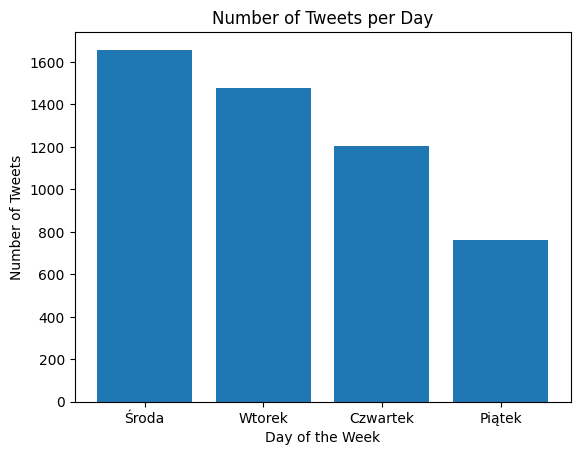

In [ ]:
with PdfPages('tweets_per_day_plot.pdf') as pdf:
    plt.bar(tweets_per_day_df['Day'], tweets_per_day_df['Tweets'])
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets per Day')
    pdf.savefig()

plt.show()